In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/worldwide-coffee-habits-dataset/worldwide_coffee_habits.csv")

In [3]:
df.head()

,Country,Year,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Type of Coffee Consumed,Population (millions)
0,Country_39,2023,9.253939,6.467453,Americano,65.929478
1,Country_29,2011,9.981203,4.346744,Mocha,82.456680
2,Country_15,2020,3.312916,8.767496,Latte,110.938862
3,Country_43,2005,2.436180,11.748750,Espresso,43.137207
4,Country_8,2019,4.637849,8.999099,Mocha,65.484262


In [4]:
df.describe()

,Year,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Population (millions)
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2011.666900,6.061865,9.461891,75.167120
std,6.911695,2.313427,3.151403,43.023176
min,2000.000000,2.000385,4.000742,1.002494
25%,2006.000000,4.070743,6.728261,37.465847
50%,2012.000000,6.094491,9.458371,75.021943
75%,2018.000000,8.061127,12.136285,112.595868
max,2023.000000,9.999399,14.997053,149.995850


In [5]:
df.shape

(10000, 6)

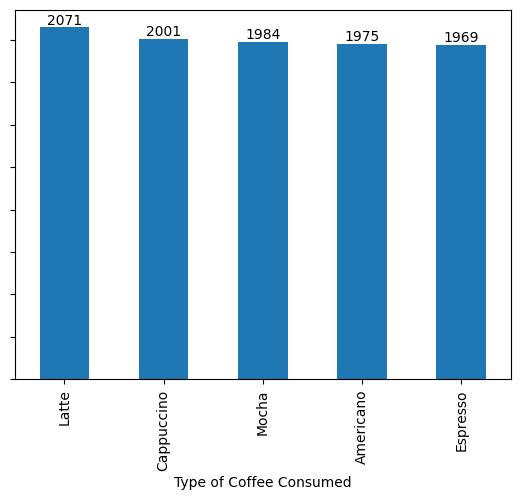

In [6]:
fig, axes = plt.subplots()
df["Type of Coffee Consumed"].value_counts().plot(kind="bar", ax=axes)

for container in axes.containers:
    axes.bar_label(container)
axes.set_yticklabels(())
plt.show()

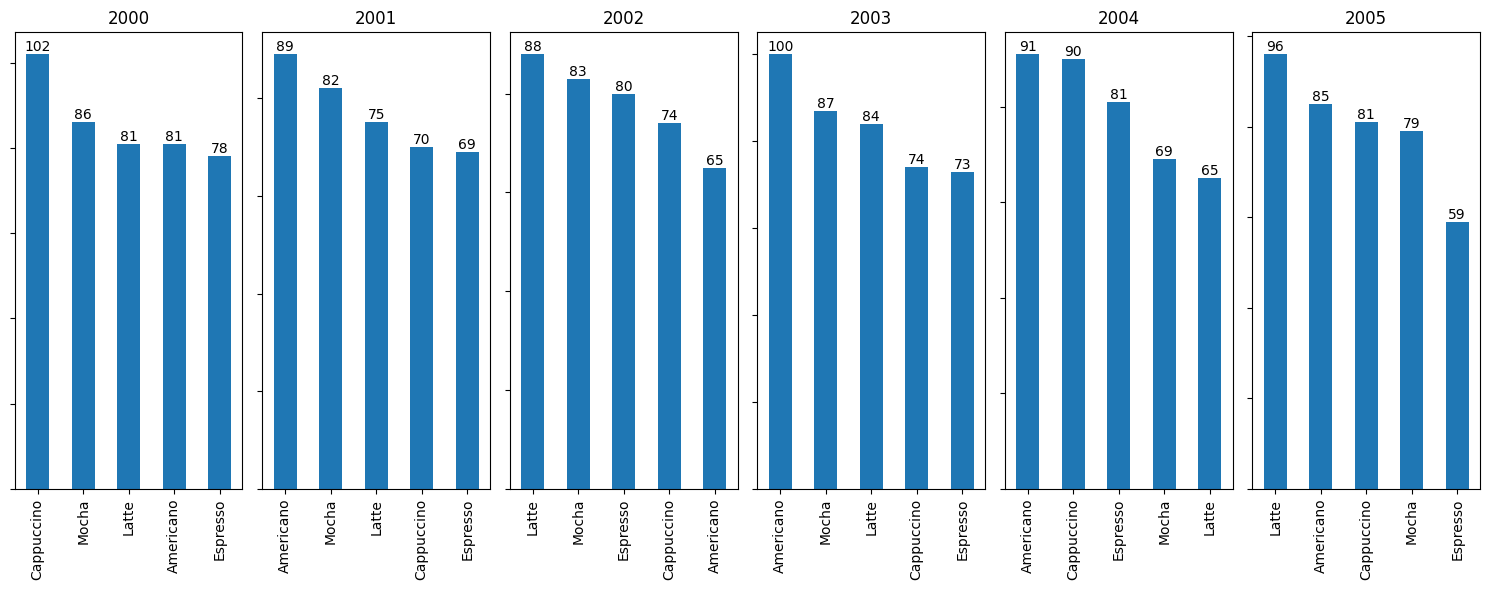

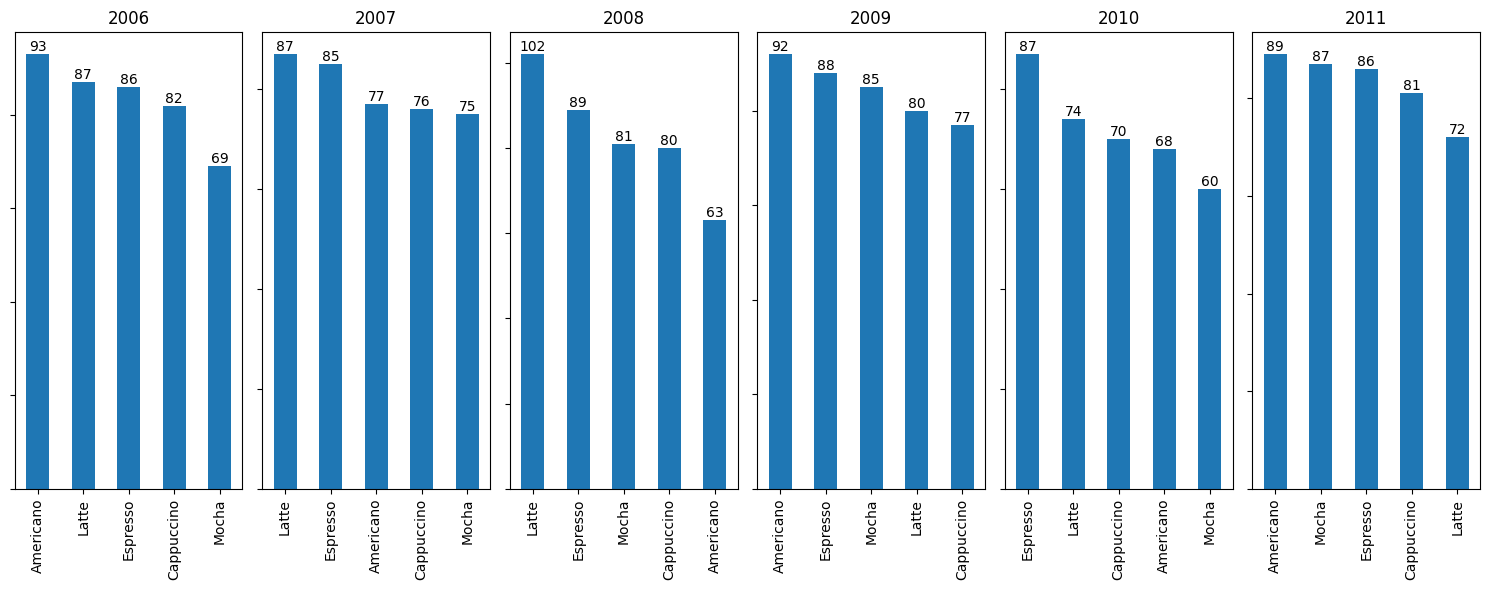

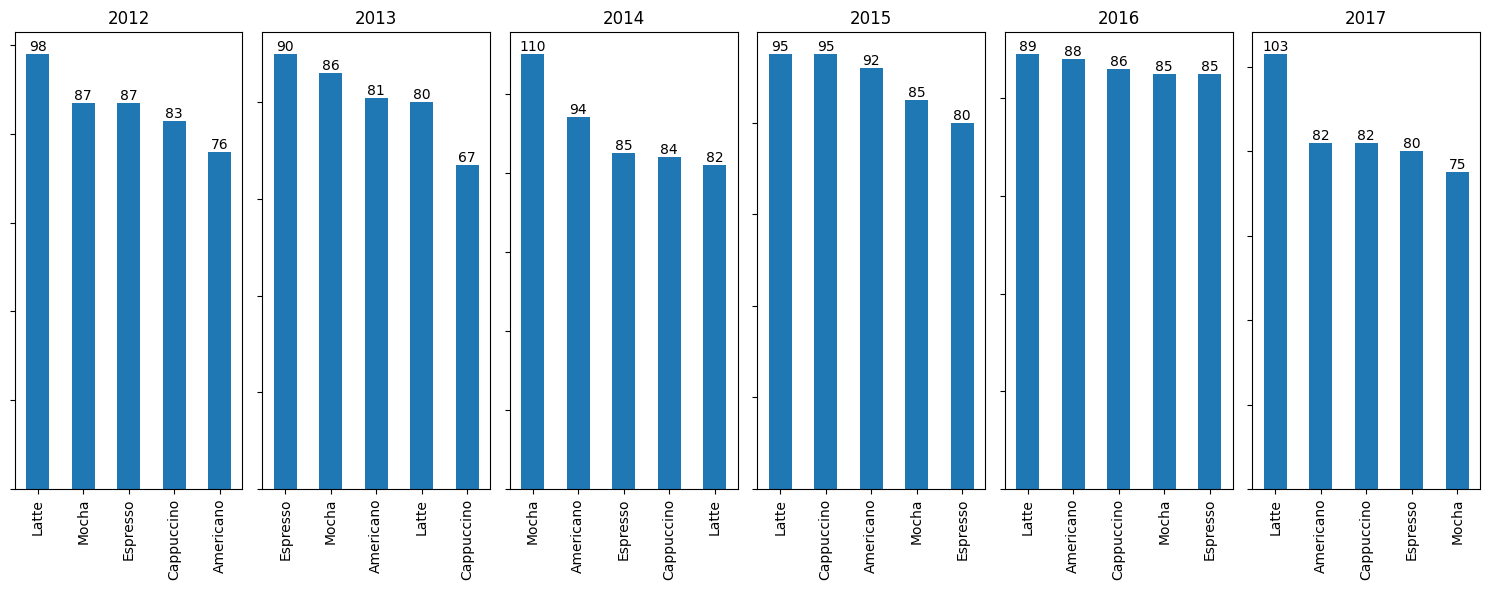

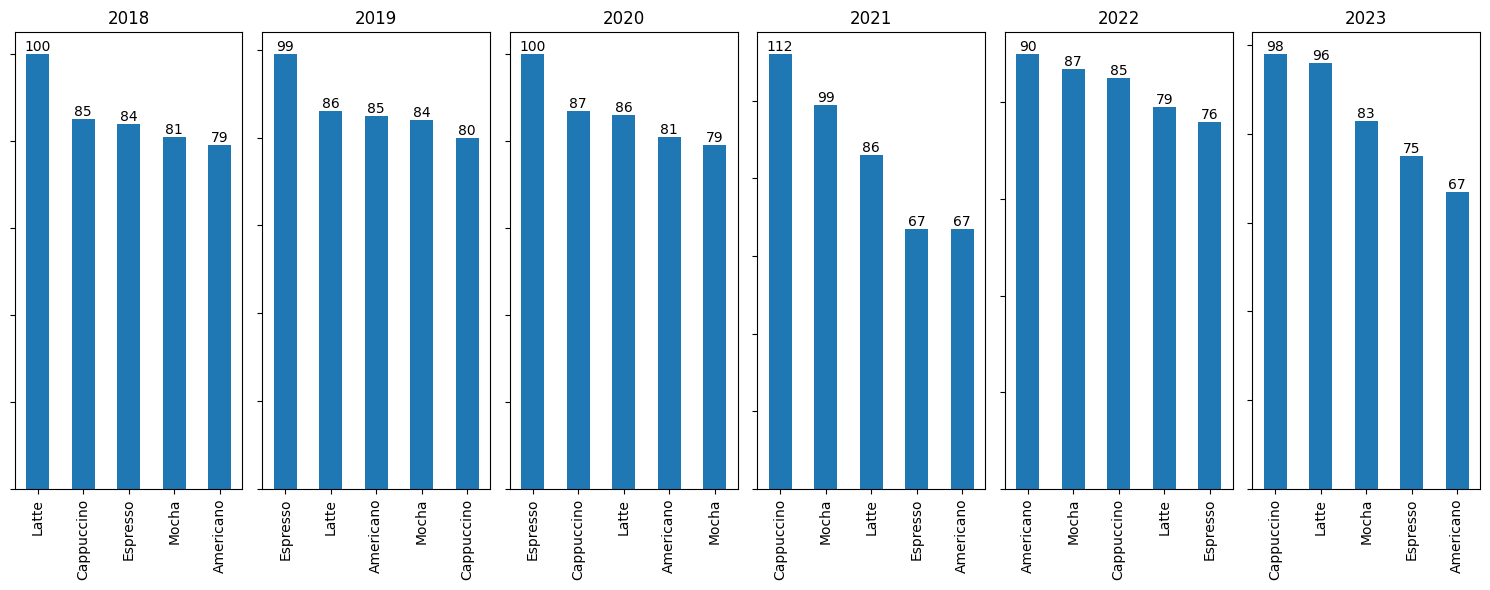

In [7]:
index = 0
years = sorted(df["Year"].unique())

for i in range(4):
    fig, axes = plt.subplots(ncols=6, figsize=(15, 6))
    for j in range(6):
        temp_df = df[df["Year"] == years[index]]
        count = temp_df["Type of Coffee Consumed"].value_counts()
        count.plot(kind="bar", ax=axes[j])
        for container in axes[j].containers:
            axes[j].bar_label(container)
        axes[j].set_yticklabels(())
        axes[j].set_xlabel("")
        axes[j].set_title(years[index])
        index += 1
    plt.tight_layout()
    plt.show()

In [8]:
nums = ["Coffee Consumption (kg per capita per year)", "Average Coffee Price (USD per kg)", "Population (millions)"]
cats = ["Year", "Type of Coffee Consumed"]

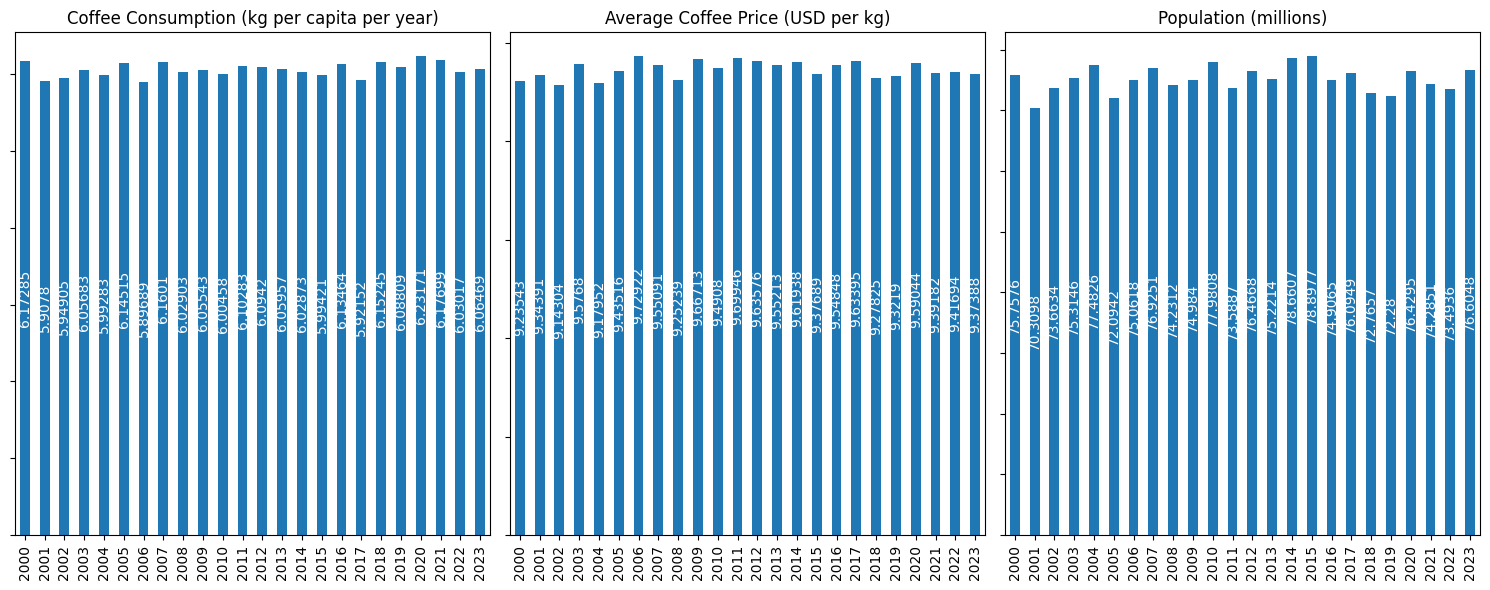

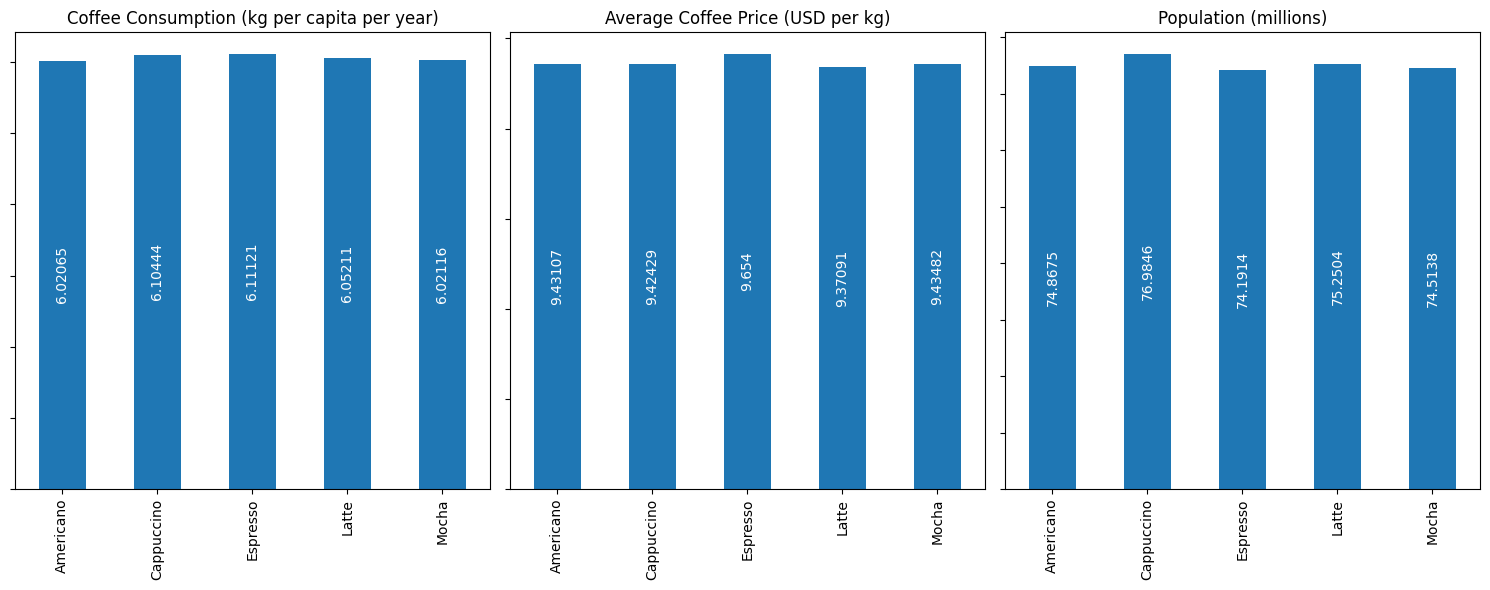

In [9]:
from IPython.core.display import display, HTML
for i in cats:
    display(HTML("<h2>{}</h2>".format(i)))
    grouped = df.groupby(i)
    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
    
    for j, k in enumerate(nums):

        mean = grouped[k].mean()

        mean.plot(kind="bar", ax=axes[j])
        for container in axes[j].containers:
            axes[j].bar_label(container, label_type="center", rotation=90, color="w")
        axes[j].set_yticklabels(())
        axes[j].set_xlabel("")
        axes[j].set_title(k)
    plt.tight_layout()
    plt.show()

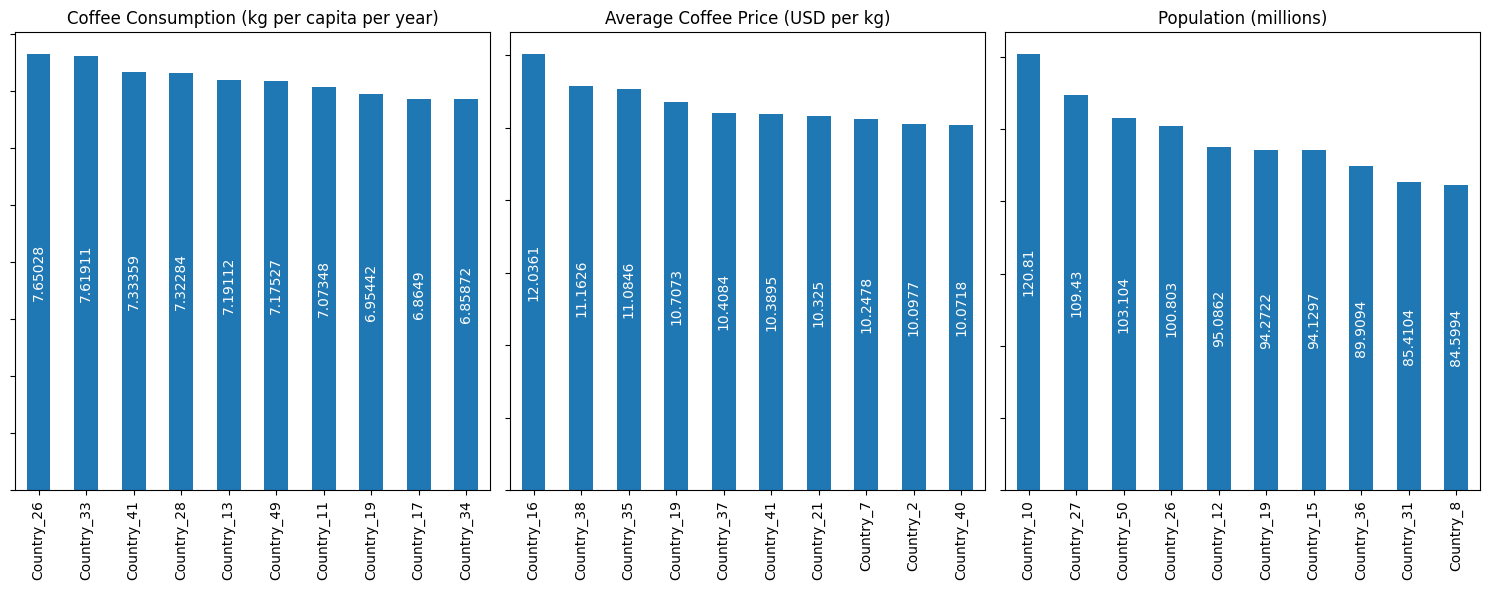

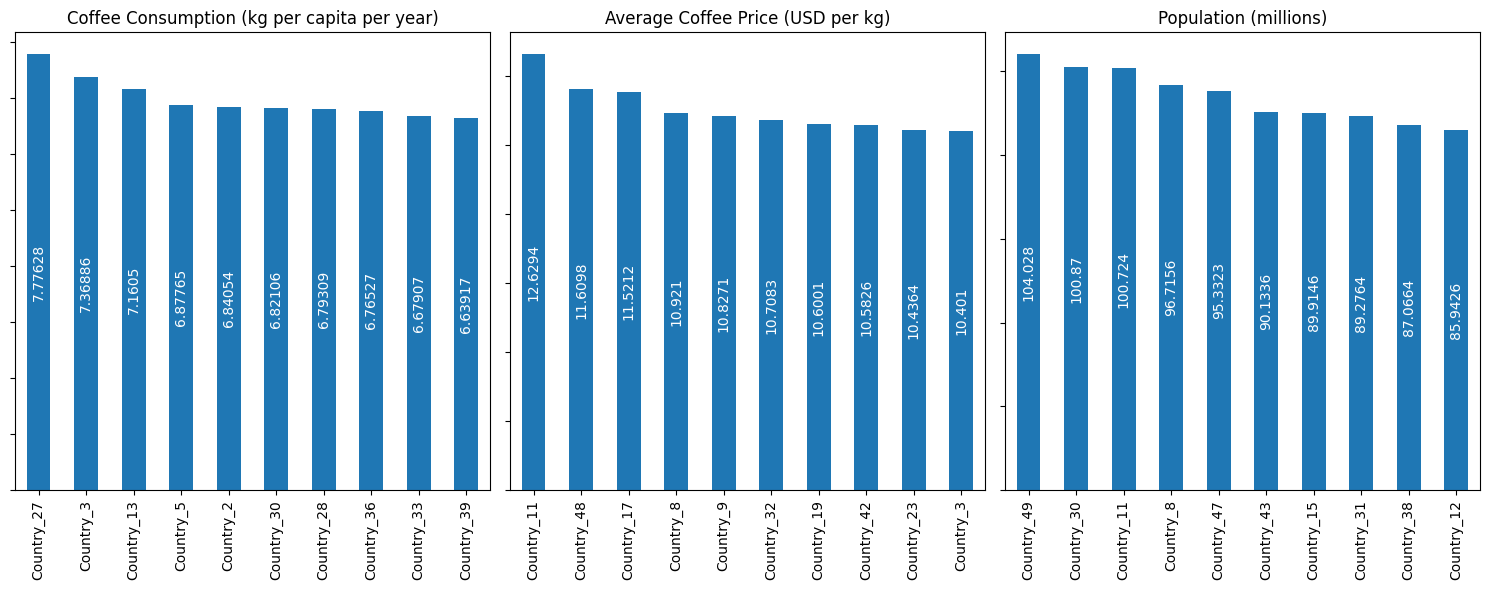

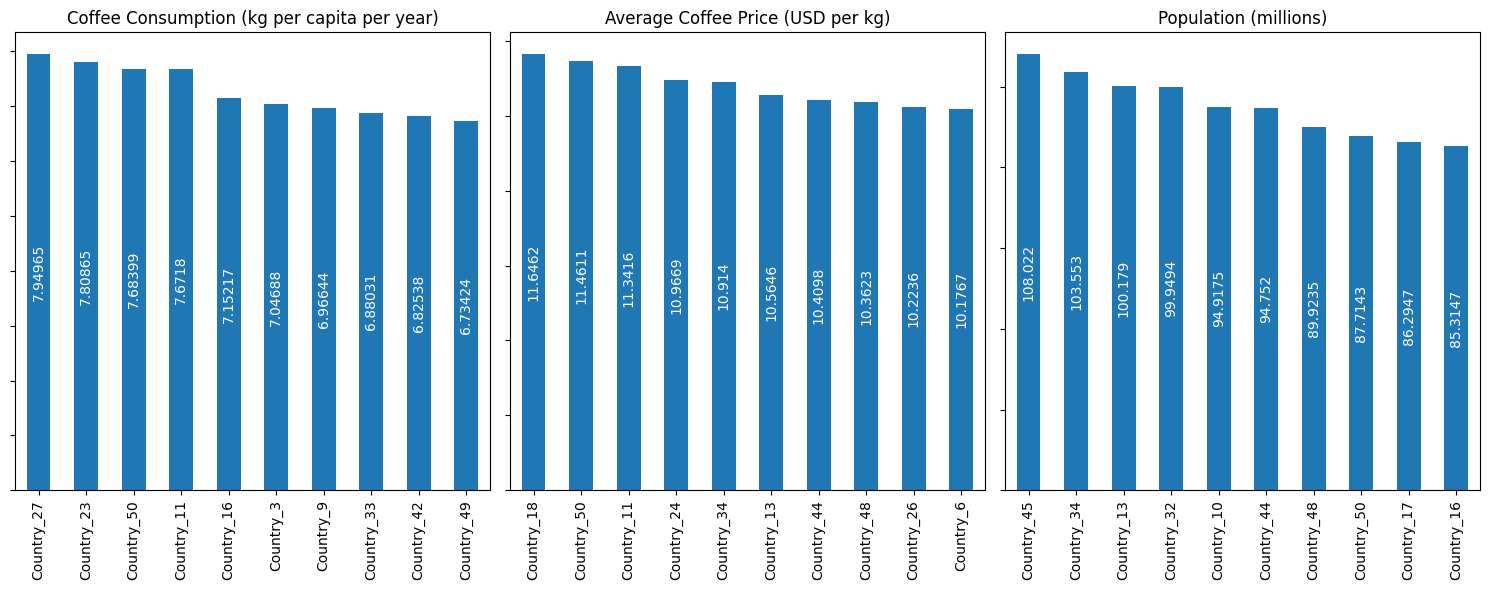

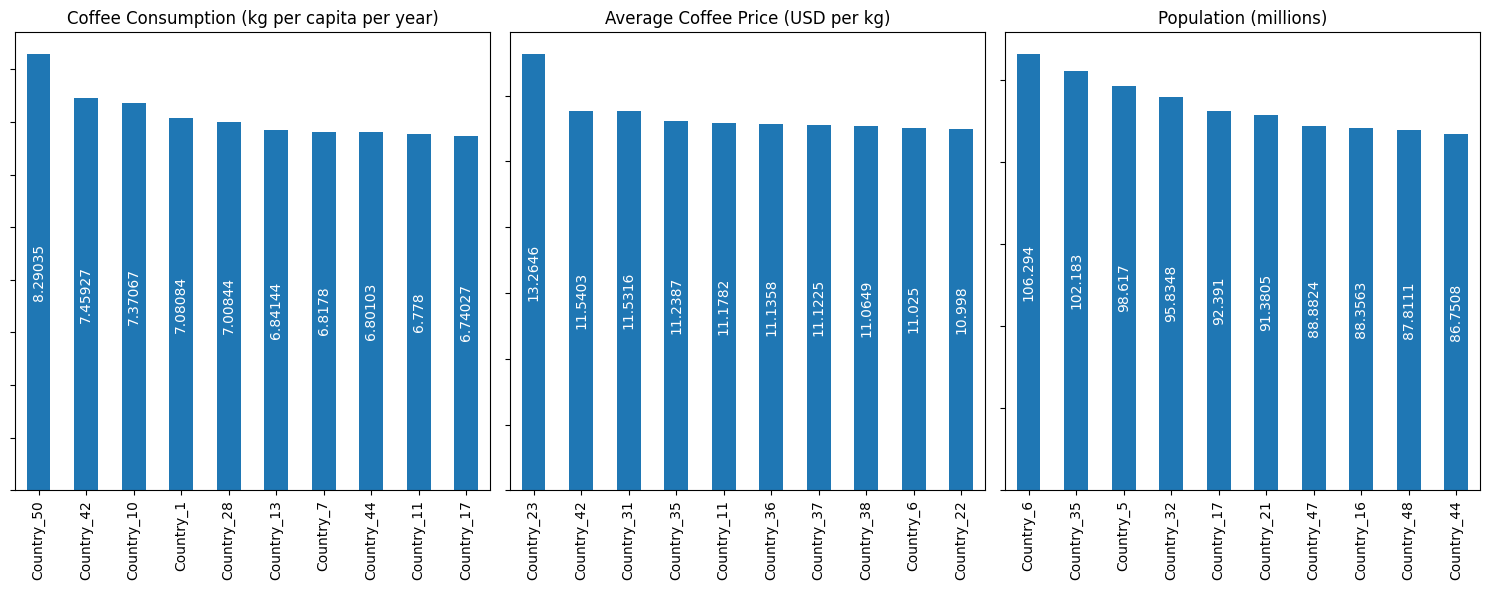

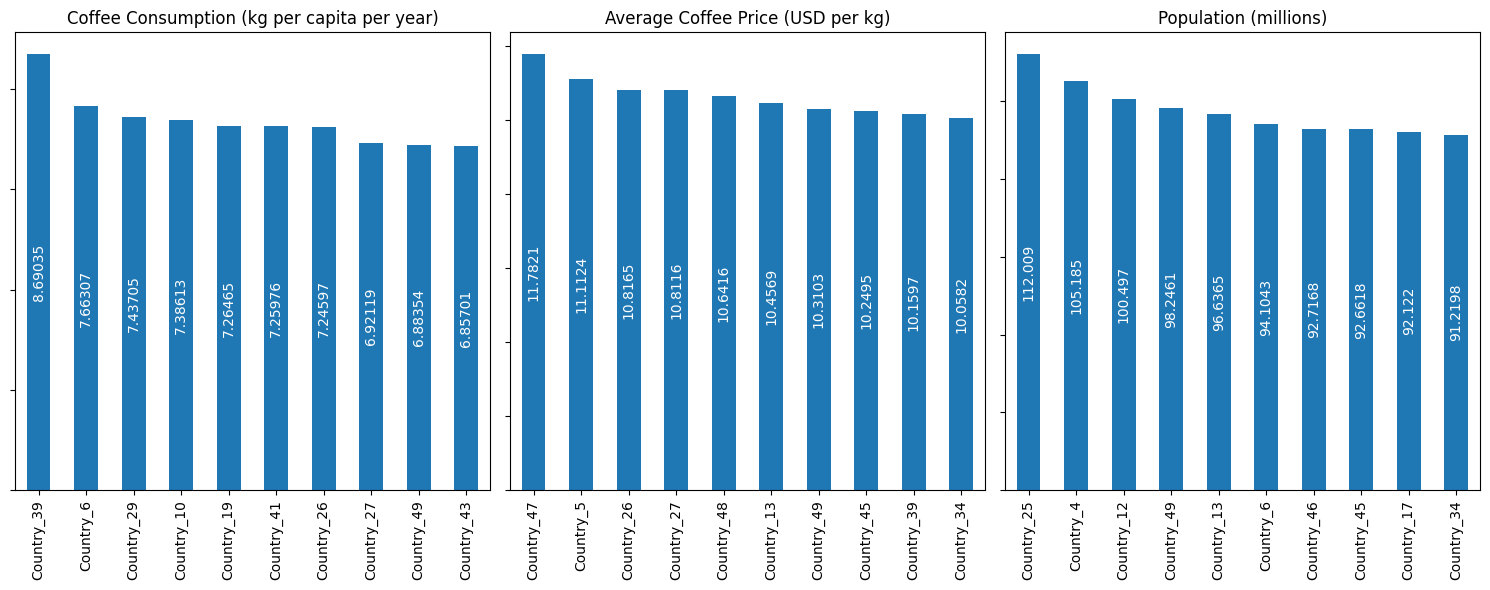

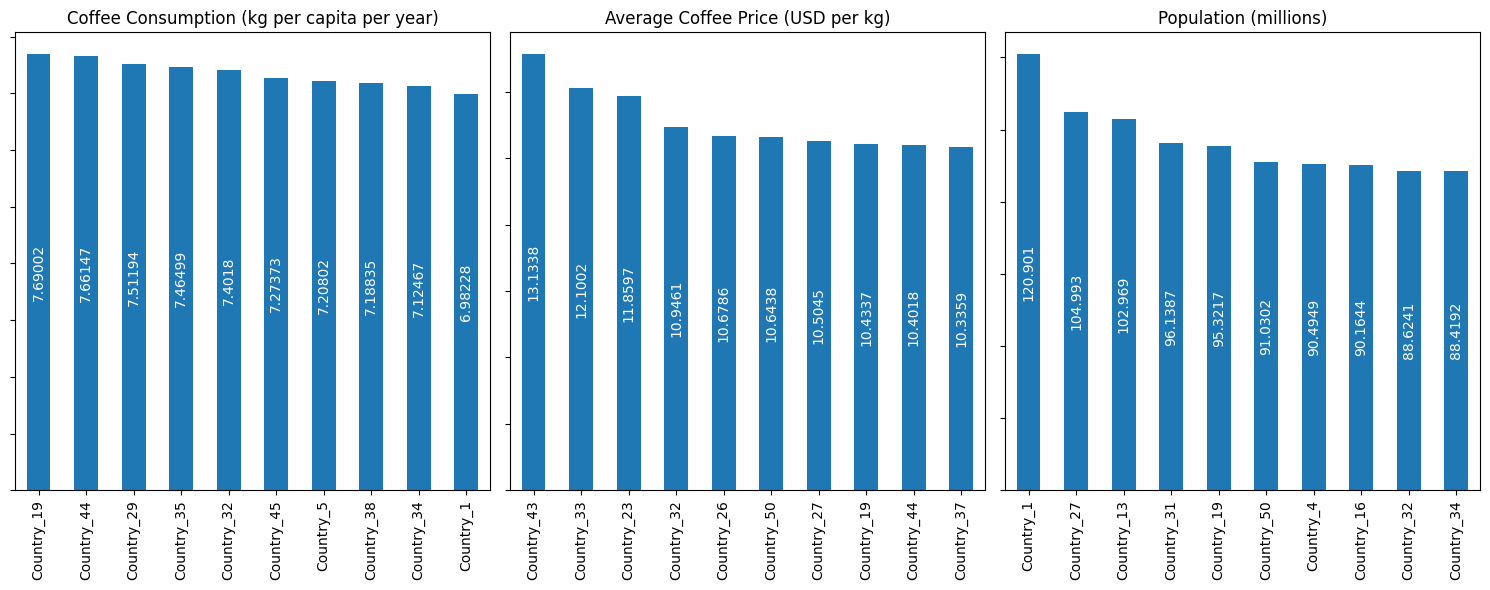

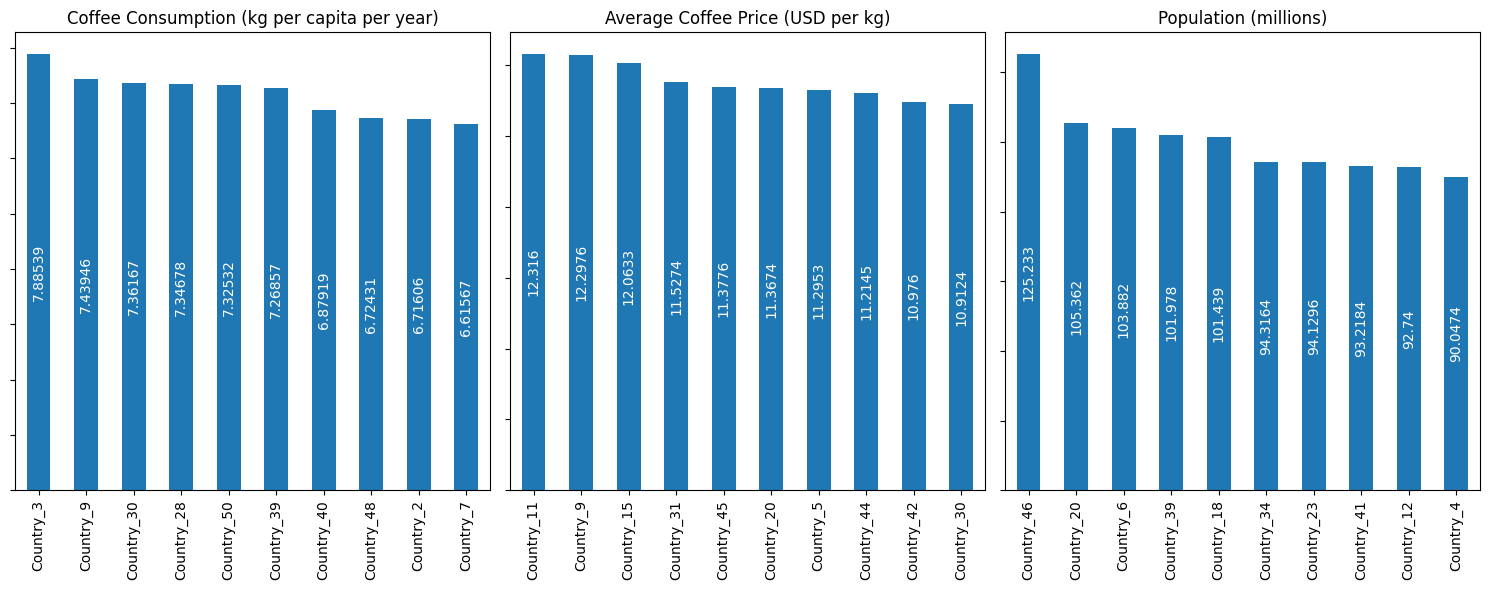

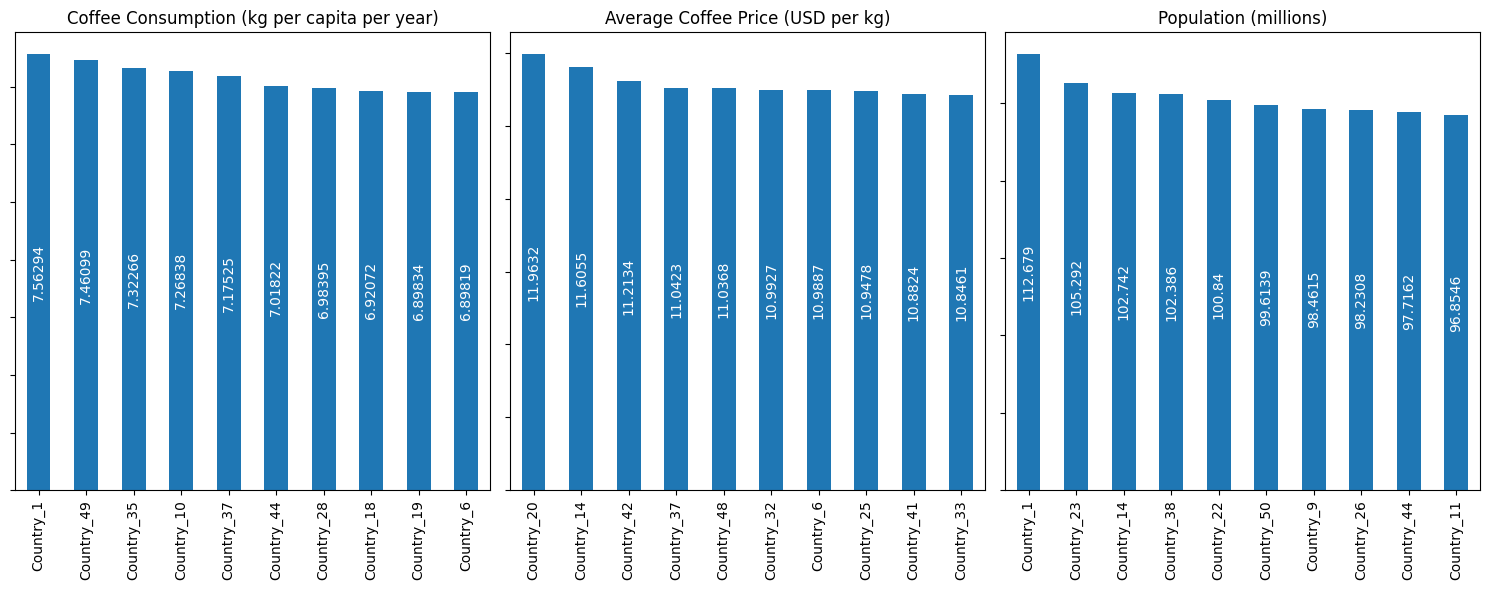

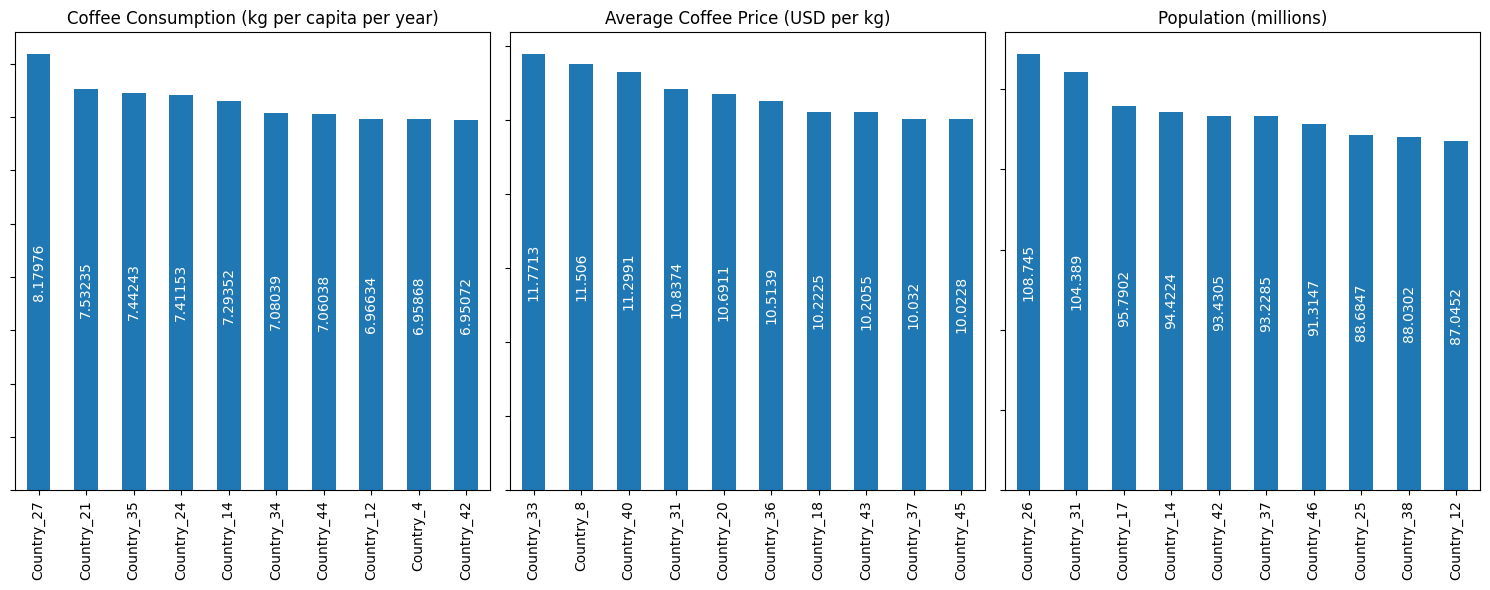

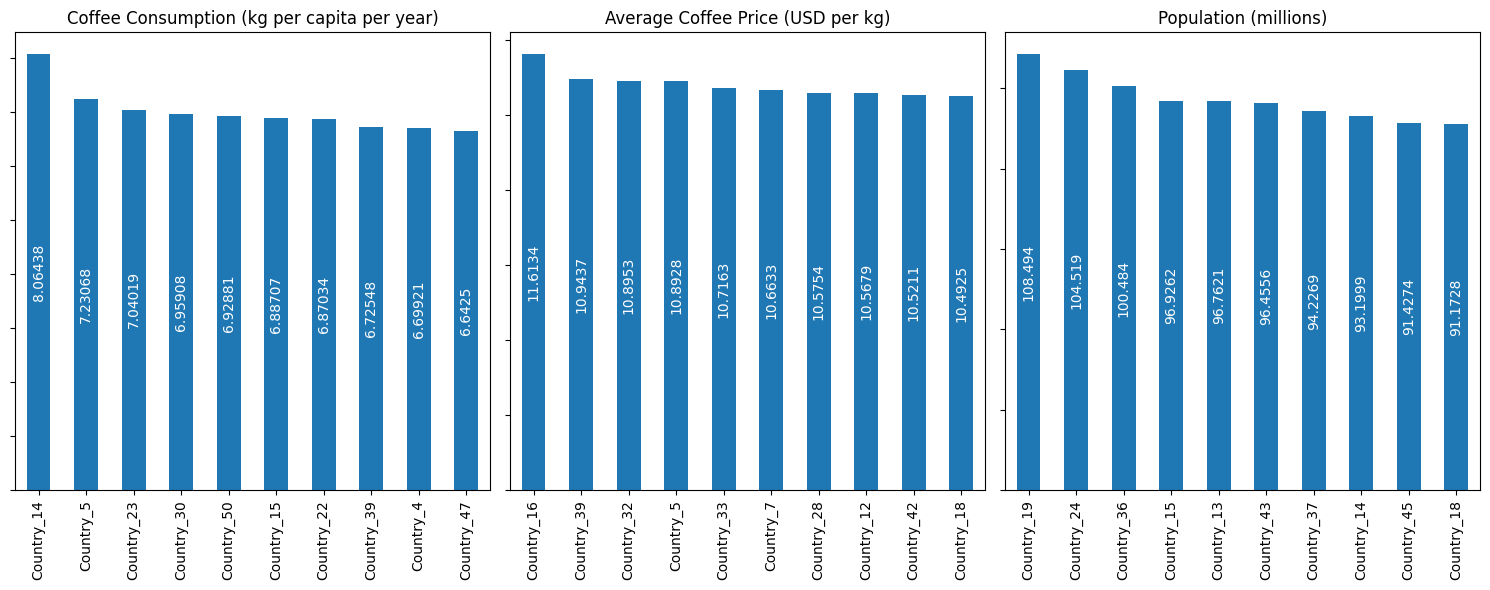

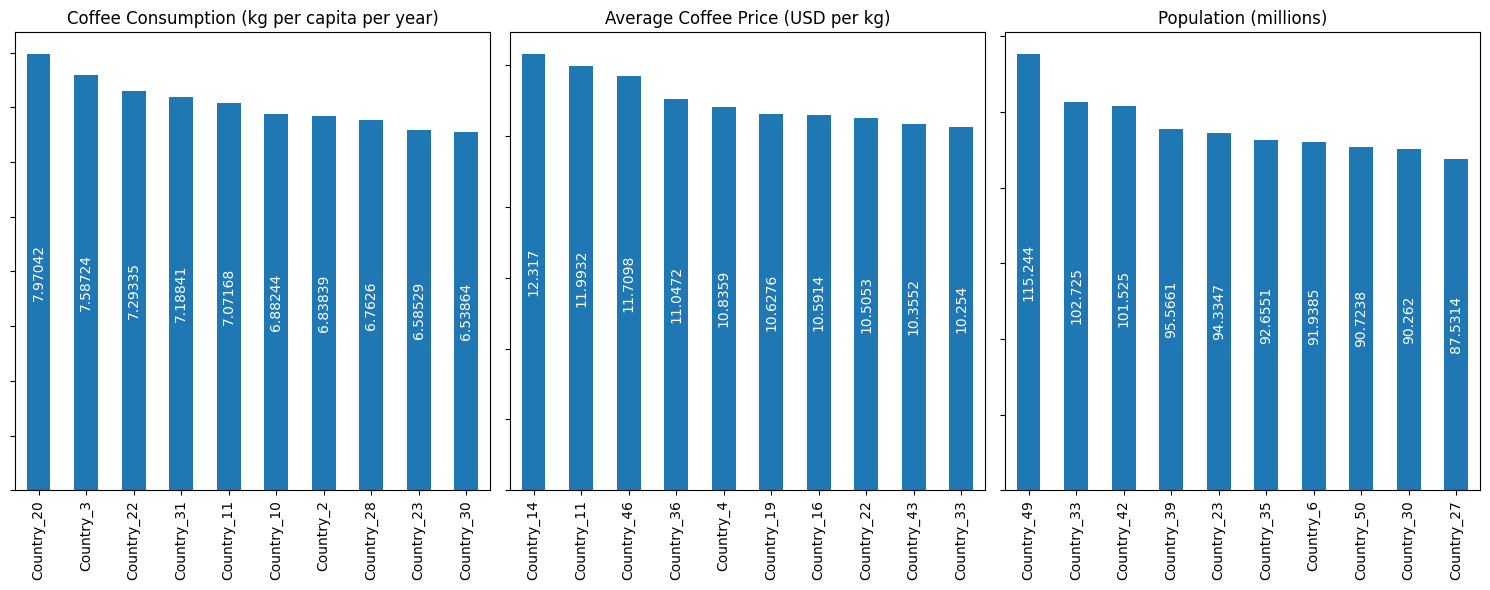

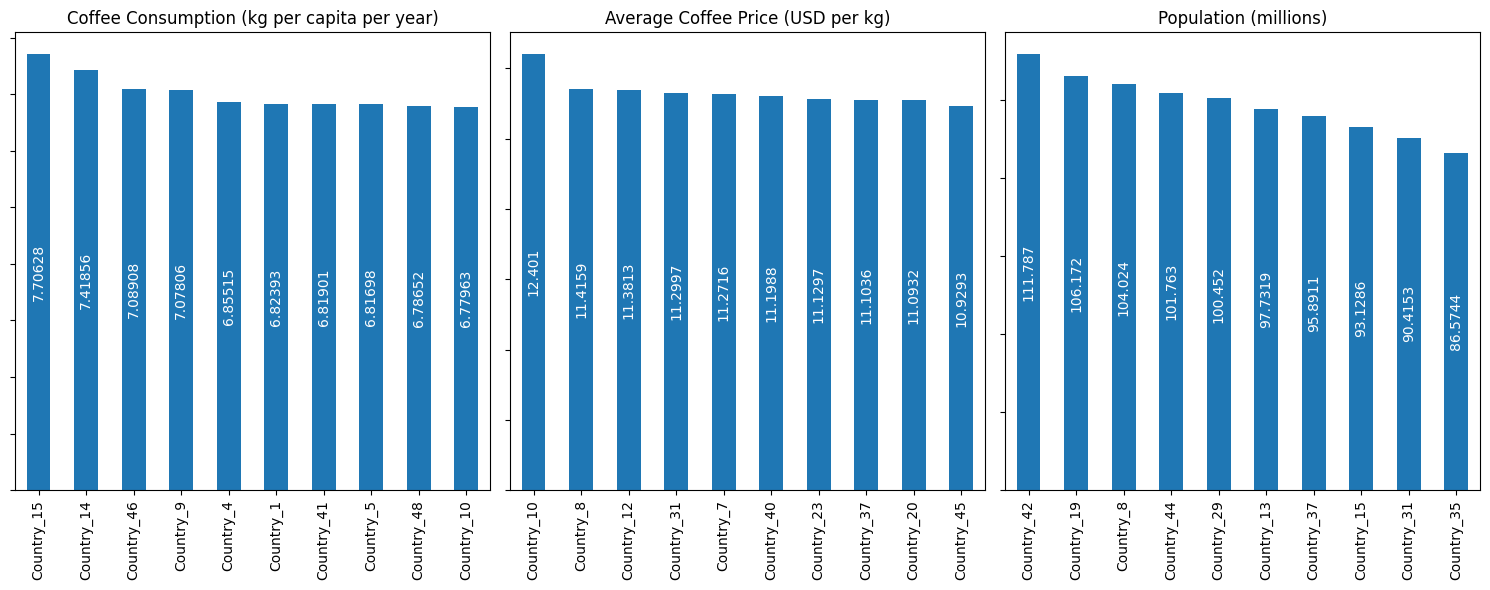

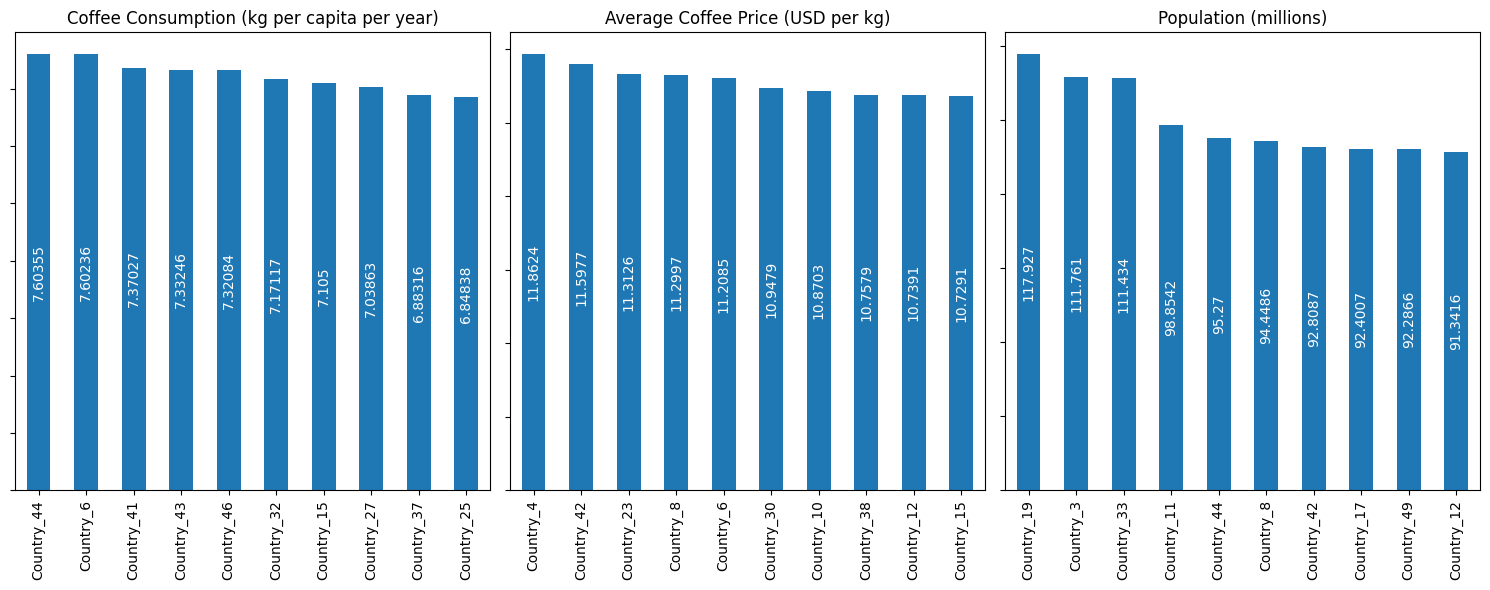

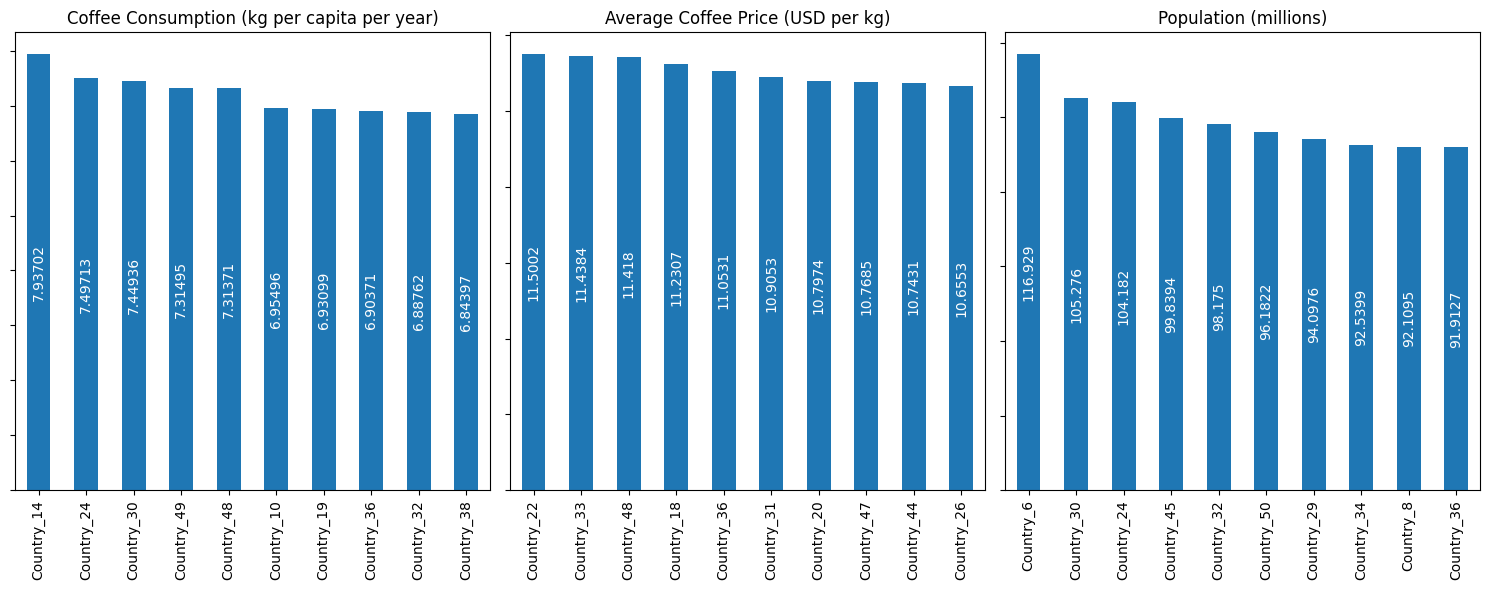

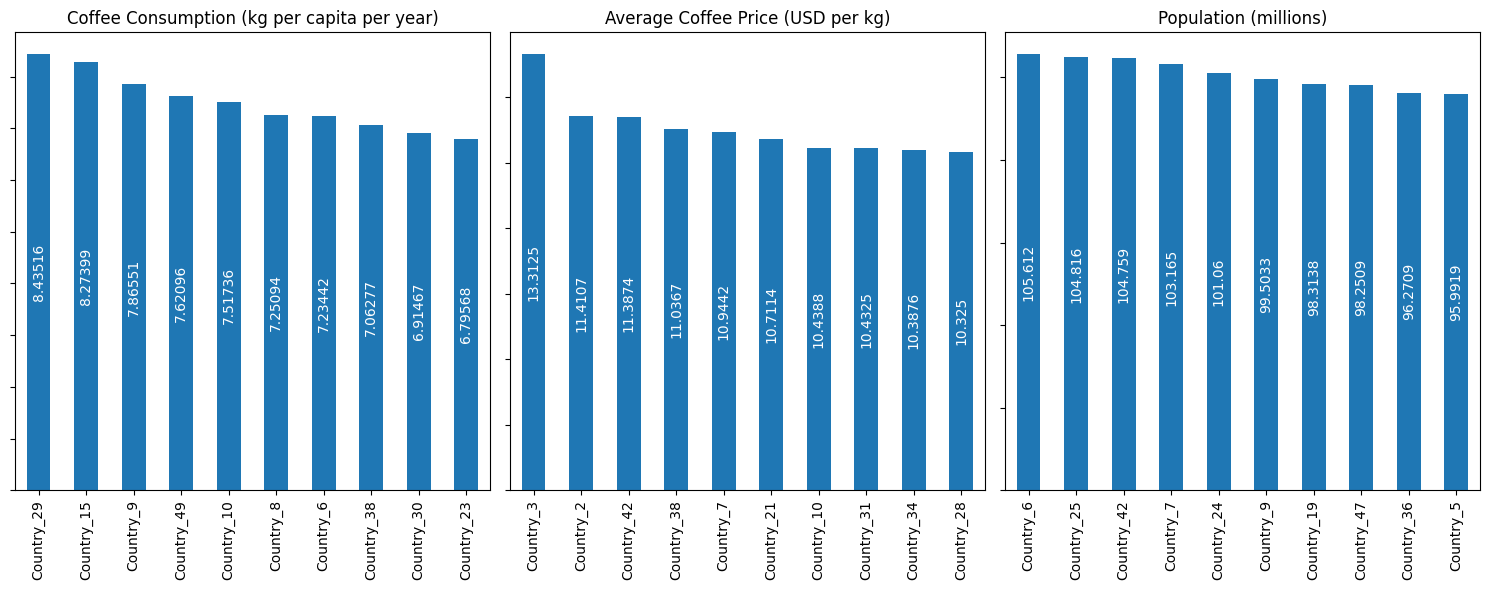

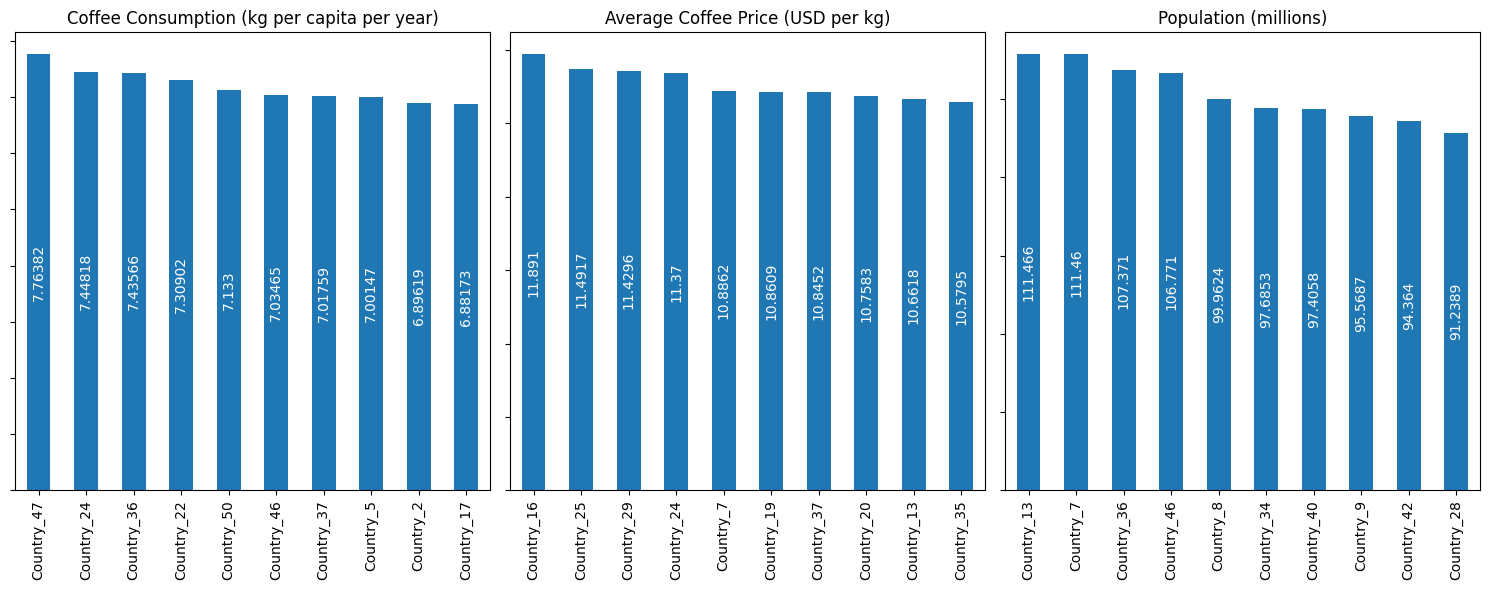

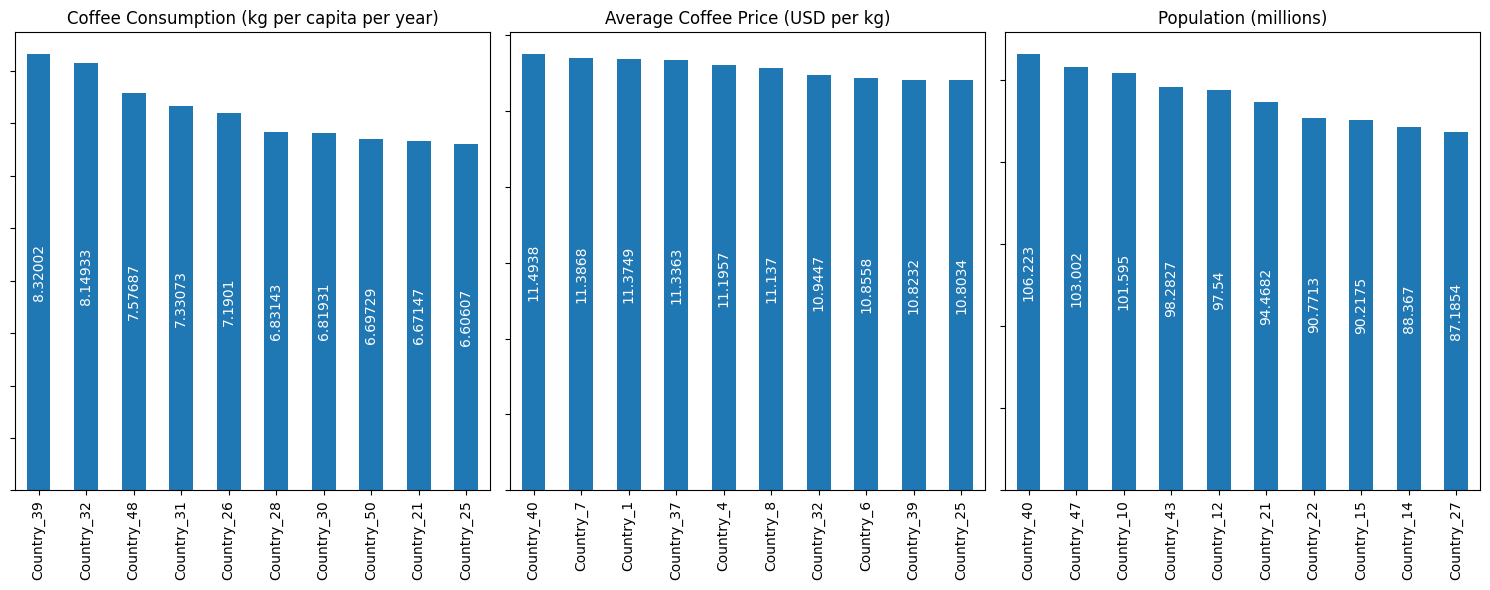

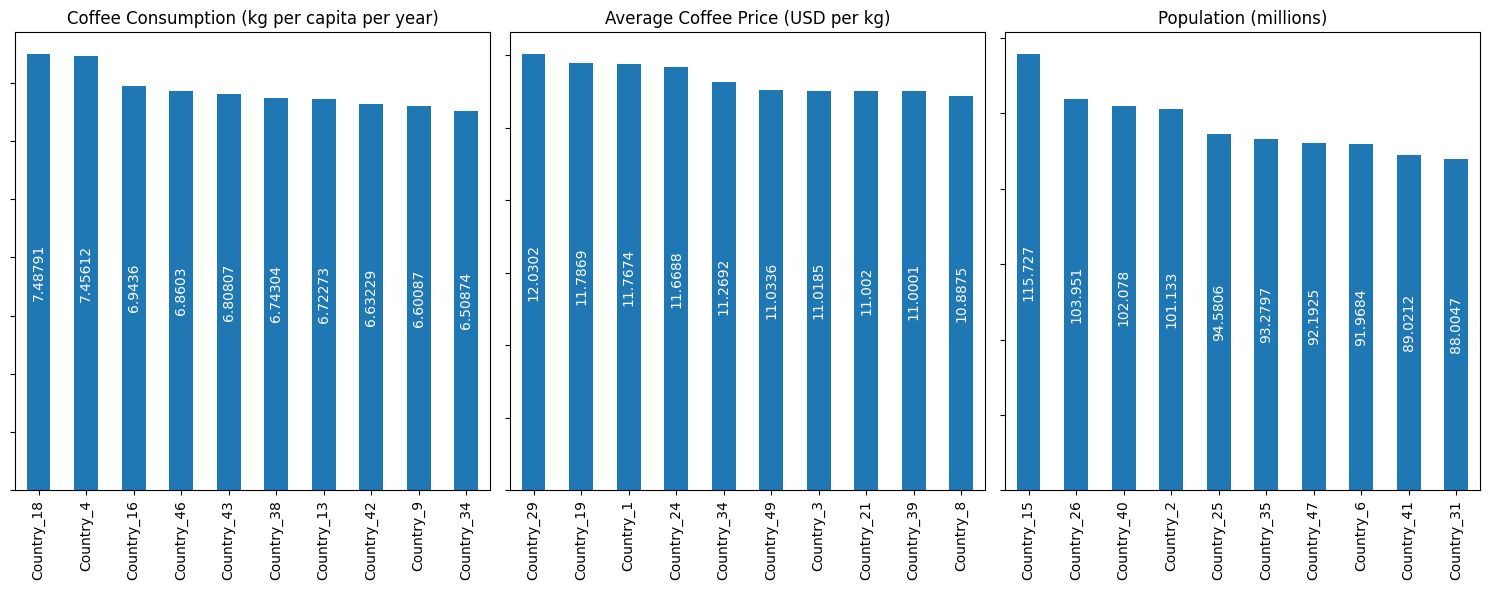

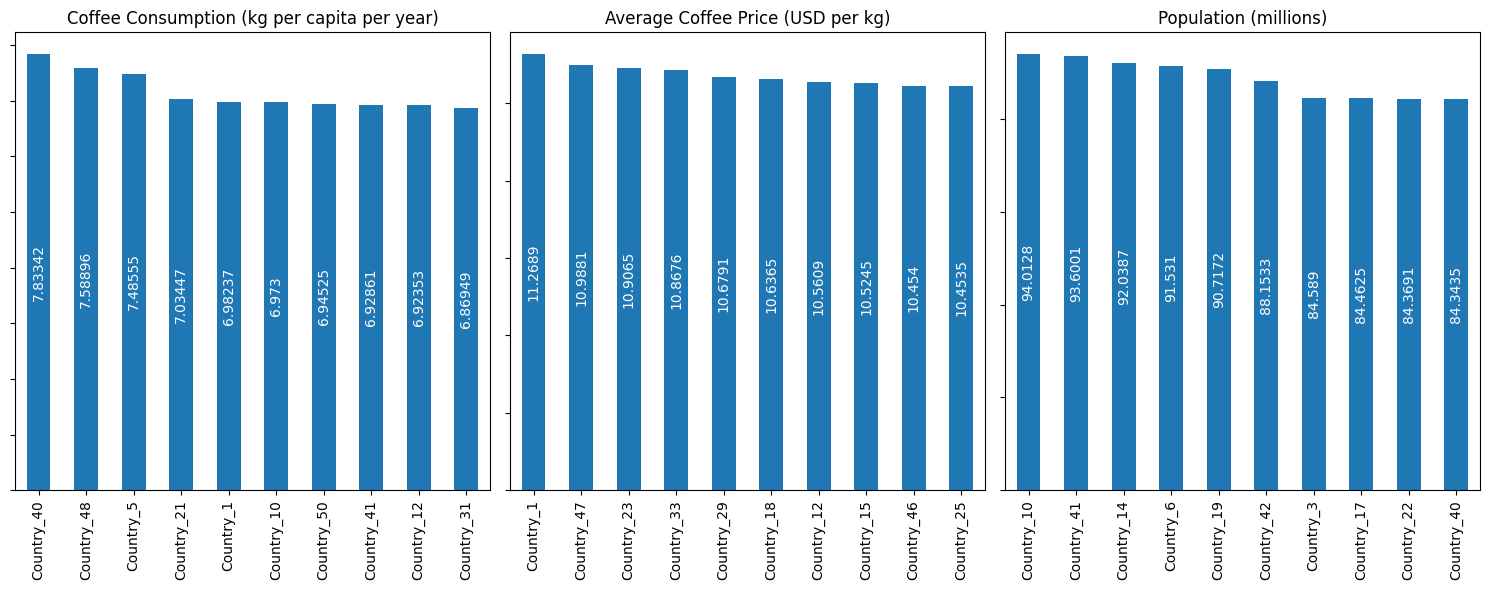

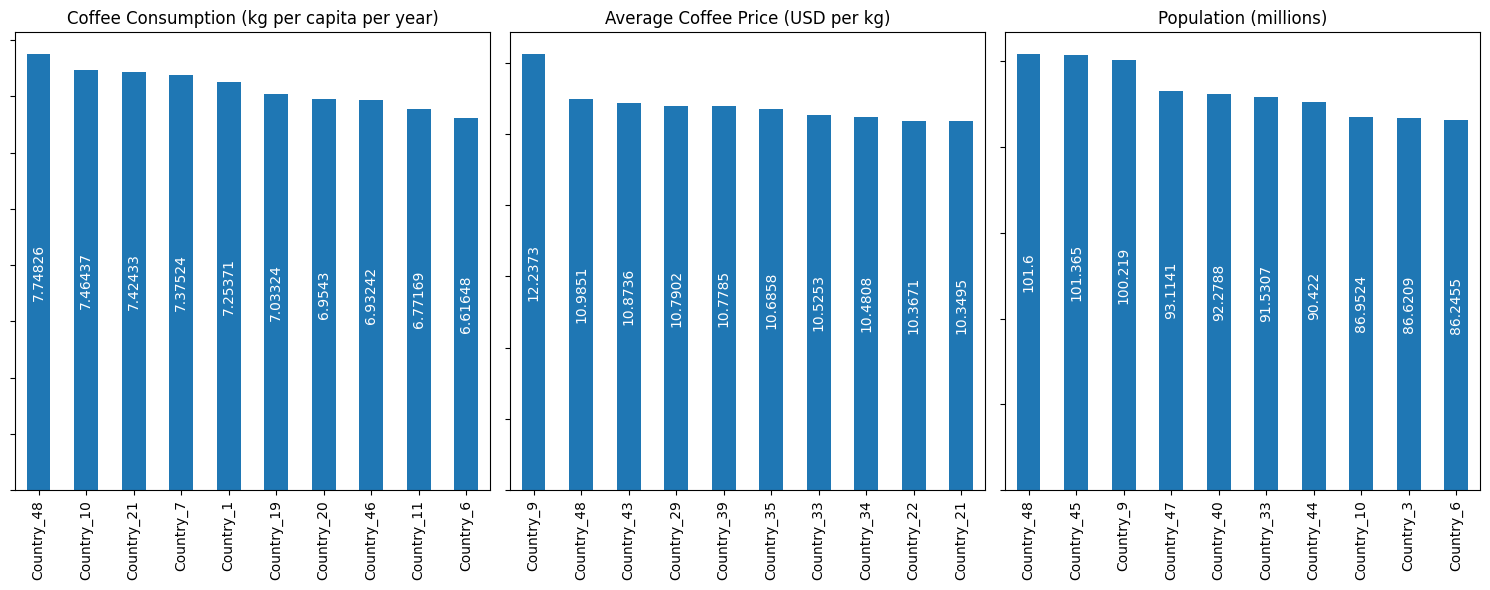

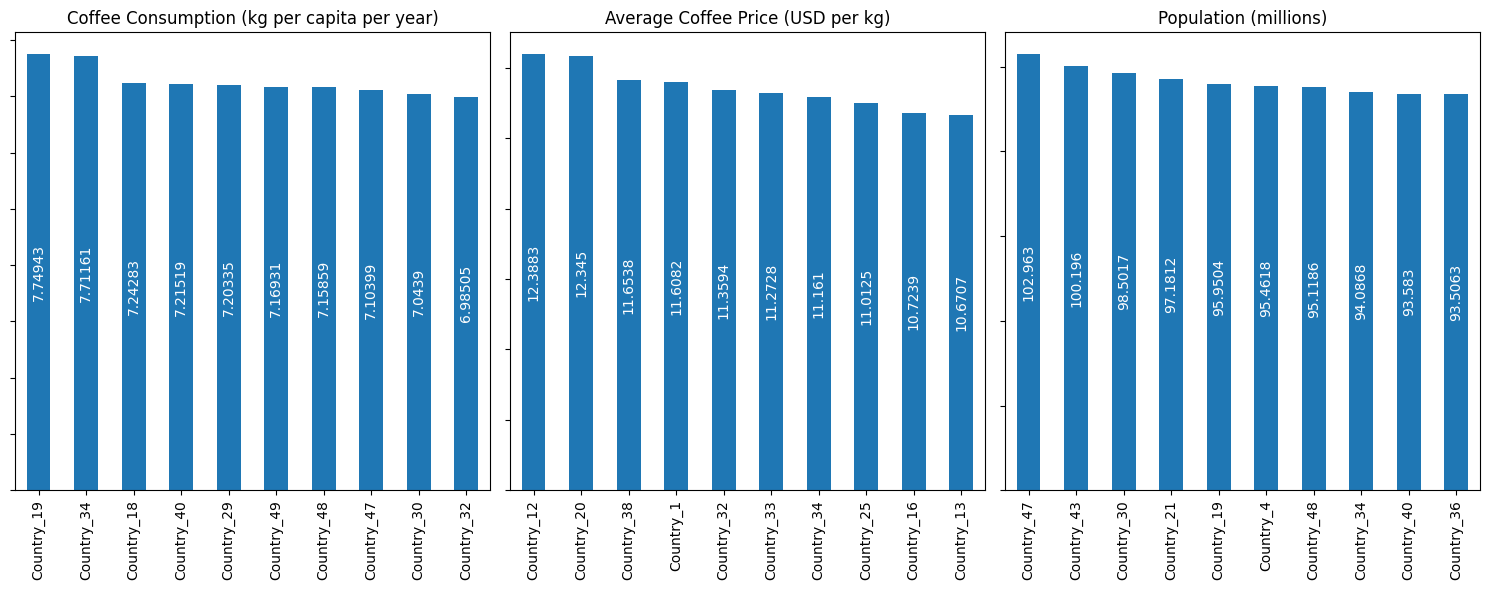

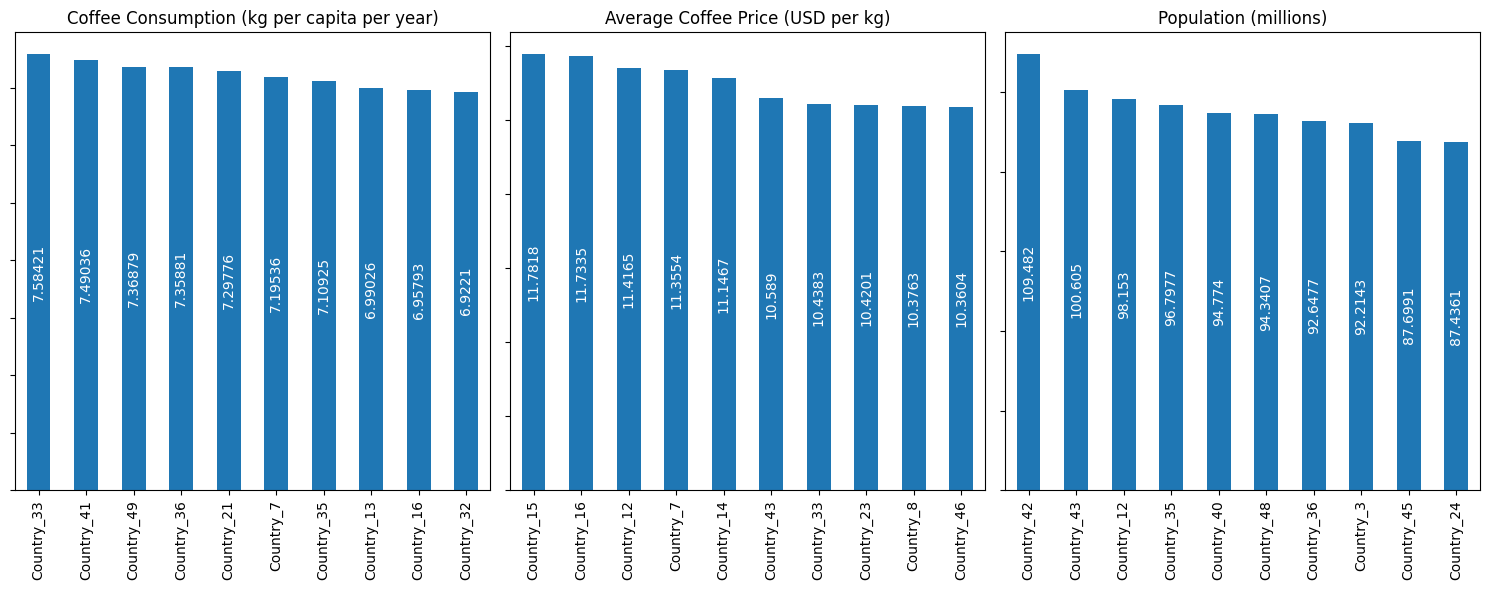

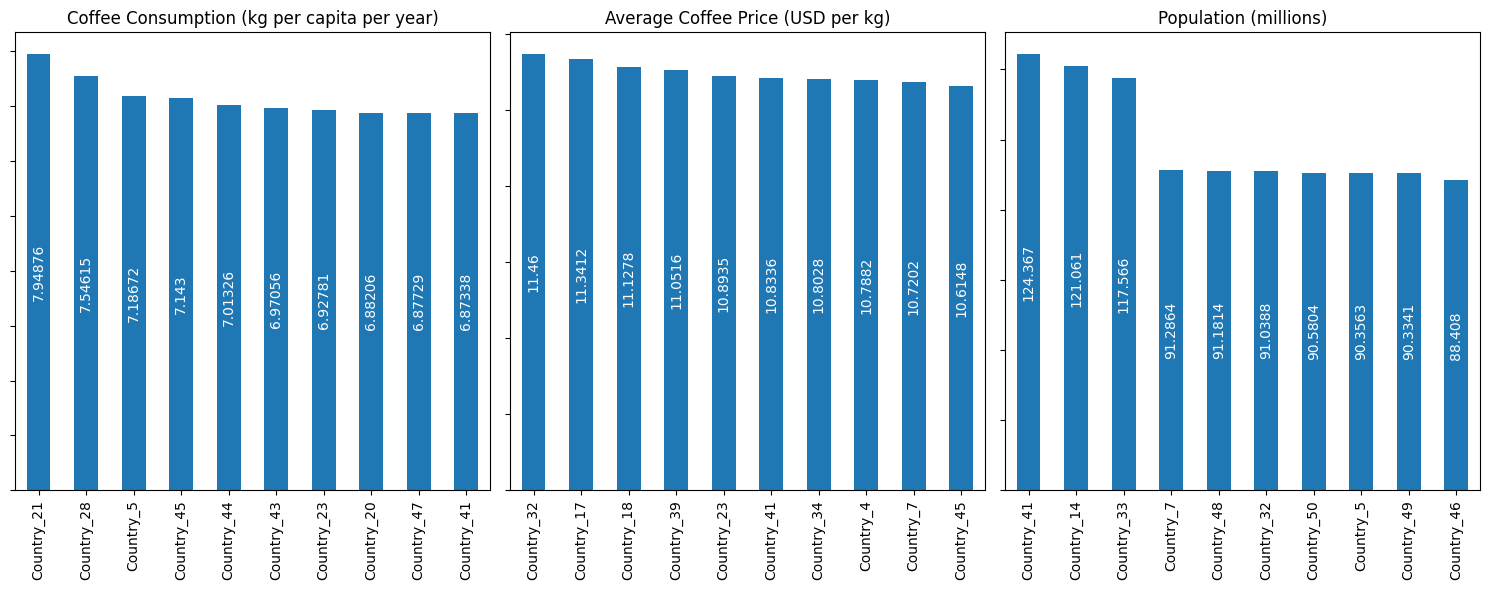

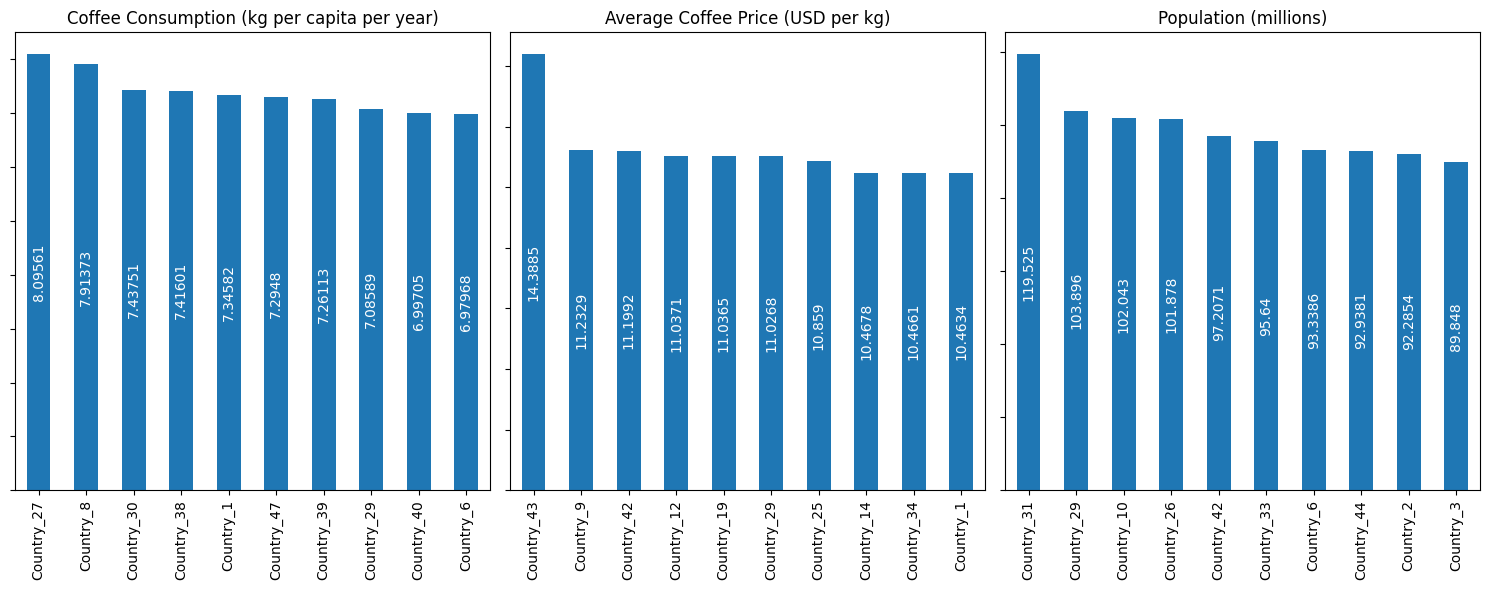

In [10]:
for i in years:
    display(HTML("<h2>{}</h2>".format(i)))
    temp_df = df[df["Year"] == i]
    grouped = temp_df.groupby("Country")
    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
    
    for j, k in enumerate(nums):

        mean = grouped[k].mean()
        mean = mean.sort_values(ascending=False)

        mean[:10].plot(kind="bar", ax=axes[j])
        for container in axes[j].containers:
            axes[j].bar_label(container, label_type="center", rotation=90, color="w")
        axes[j].set_yticklabels(())
        axes[j].set_xlabel("")
        axes[j].set_title(k)
    plt.tight_layout()
    plt.show()